DAEN 690- CAPSTONE PROJECT- TEAM PATRIOTS

TEAM MEMBERS

1) SHIVA RAM KAUSHIL PABBA
2) ANDREW BLOOM
3) DODDANAIK BASAVARAJ VAKKUND
4) JAHNAVI JONNALAGADDA
======================
THIS NOTEBOOK CONTAINS ANALYSIS FOR PROBLEM STATEMENT-1 AND ADDITIONAL ANALYSIS REQUESTED BY SPONSORS.

1) Find if there is a correlation between provider, shift, station, or battalion to EMS call outcome. 

Additional analysis requested by sponsors

Standard deviation of EMS call outcome for each station across all shifts. 
Standard deviation of EMS call outcome for each provider.

=============
1) Input dataset : 'EMS_call_outcomes.xlsx'
2) Output datasets: 'Provider_STD.csv','EMScalloutcome_Standarddeviation.csv

In [2]:
import csv                                #Import necessary libraries for analysis
import pandas as pd
import os
import matplotlib as plt
import numpy as np
import math
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [3]:
os.chdir('/Users/jahna/Desktop/DAEN_690_Capstone') # Change the current working directory to the folder   
                                                   # where dataset is present

In [4]:
data = pd.read_excel('./EMS_call_outcomes.xlsx') # Load the dataset

In [5]:
# Understanding data

print("The first two rows of the data looks like below:")
print(data.head(2))
print()
print("Datatypes for the columns in the dataset are:")
print(data.dtypes)
print()
print("The original size of dataset is", data.shape)
data= data.dropna()
print("The size of dataset after ignoring missing values is", data.shape)

The first two rows of the data looks like below:
   Patient_ID_Internal                 Performer_ID_Internal  \
0               482724  21D3C99E-9E01-E211-B5F5-78E7D18CFD3C   
1               482724  097E57D9-F792-E211-A596-78E7D18C3D20   

  Response_EMS_Shift Response_EMS_Vehicle_Unit_Number  Station  Battalion  \
0          B - Shift                             M414       14        407   
1          B - Shift                             M414       14        407   

  Disposition_Incident_Patient_Disposition  
0                   Treated & Transported   
1                   Treated & Transported   

Datatypes for the columns in the dataset are:
Patient_ID_Internal                          int64
Performer_ID_Internal                       object
Response_EMS_Shift                          object
Response_EMS_Vehicle_Unit_Number            object
Station                                      int64
Battalion                                    int64
Disposition_Incident_Patient_Dispositi

In [6]:
print("The number of providers are", data.Performer_ID_Internal.nunique())
print("The number of patients/emergencies handled are",data.Patient_ID_Internal.nunique())
print("The number of response vehicle unit numbers are",data.Response_EMS_Vehicle_Unit_Number.nunique())
print("The number of stations are",data.Station.nunique())
print("The number of batallions are", data.Battalion.nunique())
print("The number of shifts are", data.Response_EMS_Shift.nunique())
print("Thw number of unique type of incidents handled are", data.Disposition_Incident_Patient_Disposition.nunique())

The number of providers are 1542
The number of patients/emergencies handled are 207418
The number of response vehicle unit numbers are 54
The number of stations are 38
The number of batallions are 7
The number of shifts are 3
Thw number of unique type of incidents handled are 12


In [7]:
# subsetting data to find significance and correlation between provider, shift, station, or battalion to 
# EMS call outcome.
df = data[[i for i in data.columns if i not in ('Response_EMS_Vehicle_Unit_Number','Patient_ID_Internal')]]

df.head()

,Performer_ID_Internal,Response_EMS_Shift,Station,Battalion,Disposition_Incident_Patient_Disposition
0,21D3C99E-9E01-E211-B5F5-78E7D18CFD3C,B - Shift,14,407,Treated & Transported
1,097E57D9-F792-E211-A596-78E7D18C3D20,B - Shift,14,407,Treated & Transported
2,3404E99E-4CF6-E311-A585-F305C4522FCB,B - Shift,34,403,No Treatment/Transport Required
3,59D7C99E-9E01-E211-B5F5-78E7D18CFD3C,B - Shift,34,403,No Treatment/Transport Required
4,EED2C99E-9E01-E211-B5F5-78E7D18CFD3C,B - Shift,34,403,No Treatment/Transport Required


In [8]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df.columns :
  data_encoded[i]=label.fit_transform(df[i])

In [9]:
data_encoded.head(2)

,Performer_ID_Internal,Response_EMS_Shift,Station,Battalion,Disposition_Incident_Patient_Disposition
0,207,1,10,6,10
1,50,1,10,6,10


In [10]:
# ======================= Significance or chisquare test ===================
### Peformer and ems call outcome
data_crosstab_performer = pd.crosstab(data_encoded['Performer_ID_Internal'], 
                            data_encoded['Disposition_Incident_Patient_Disposition'],  margins = False)
stat, p, dof, expected = chi2_contingency(data_crosstab_performer)
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Performer and ems call outcome are associated (reject H0)')
else:
    print('Performer and ems call outcome are associated(fail to reject H0)')
                                      
### EMS shift and ems call outcome
                                      
data_crosstab_shift = pd.crosstab(data_encoded['Response_EMS_Shift'], 
                            data_encoded['Disposition_Incident_Patient_Disposition'],margins = False)  
stat, p, dof, expected = chi2_contingency(data_crosstab_shift)
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Shift and ems call outcome are associated (reject H0)')
else:
    print('Shift and ems call outcome are associated(fail to reject H0)')

### Battalion and ems call outcome
                                  
data_crosstab_battalion = pd.crosstab(data_encoded['Battalion'], 
                            data_encoded['Disposition_Incident_Patient_Disposition'], margins = False) 
stat, p, dof, expected = chi2_contingency(data_crosstab_battalion)
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Battalion and ems call outcome are associated (reject H0)')
else:
    print('Battalion and ems call outcome are associated(fail to reject H0)')

### Battalion and ems call outcome
                                  
data_crosstab_station = pd.crosstab(data_encoded['Station'], 
                            data_encoded['Disposition_Incident_Patient_Disposition'], margins = False) 
stat, p, dof, expected = chi2_contingency(data_crosstab_station)
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Station and ems call outcome are associated (reject H0)')
else:
    print('Station and ems call outcome are associated(fail to reject H0)')

                                                                            

significance=0.050, p=0.000
Performer and ems call outcome are associated (reject H0)
significance=0.050, p=0.000
Shift and ems call outcome are associated (reject H0)
significance=0.050, p=0.000
Battalion and ems call outcome are associated (reject H0)
significance=0.050, p=0.000
Station and ems call outcome are associated (reject H0)


In [11]:
# ======================== Cramer's V test for linear correlation ===============
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df_cramer


,Performer_ID_Internal,Response_EMS_Shift,Station,Battalion,Disposition_Incident_Patient_Disposition
Performer_ID_Internal,1.00,0.48,0.45,0.59,0.01
Response_EMS_Shift,0.48,1.00,0.00,0.00,0.00
Station,0.45,0.00,1.00,1.00,0.00
Battalion,0.59,0.00,1.00,1.00,0.00
Disposition_Incident_Patient_Disposition,0.01,0.00,0.00,0.00,1.00


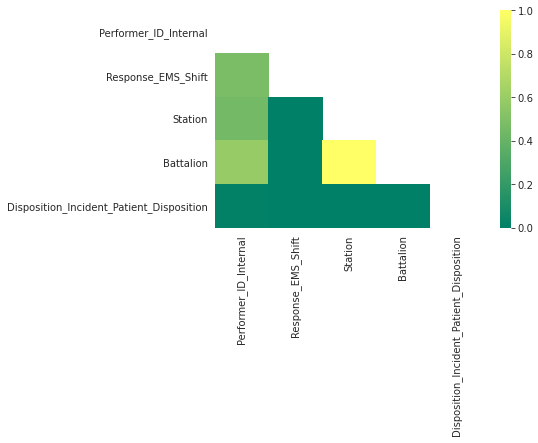

In [12]:
# ================== Plot for Cramer's V results ===========
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df_cramer, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


cmap = sns.diverging_palette(200, 10, as_cmap=True)


with sns.axes_style("white"):
  ax = sns.heatmap(df_cramer, mask=mask,cmap= 'summer', vmin=0., vmax=1)

plt.show()


In [13]:
df["patient_id"] = data["Patient_ID_Internal"]

<ipython-input-13-8a998d70f1fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["patient_id"] = data["Patient_ID_Internal"]


============================ ****STANDARD DEVIATION IN EMS CALL OUTCOME FOR PERFORMER **** ==========================

In [14]:
# Groupby perfromer to find total number of unique incidents handled
filtered_df = df.groupby(['Performer_ID_Internal']).patient_id.nunique().reset_index().rename(columns={'patient_id':'Totalincidents'})

In [15]:
group_df_filtered = filtered_df[filtered_df['Totalincidents'] < 100]  # Filter condition to get list of performers who
                                                                      # handled less than 100 incidents
group_df_filtered = group_df_filtered.reset_index()
print("Number of performers who handled less than 100 incidents are", group_df_filtered.Performer_ID_Internal.nunique())
performer_less100 = list(group_df_filtered["Performer_ID_Internal"])
df_performer_gt_100 = df[~df['Performer_ID_Internal'].isin(performer_less100)] # dropping rows that match filtered list 
print("Number of performers who handled more than 100 incidents are", df_performer_gt_100.Performer_ID_Internal.nunique())

Number of performers who handled less than 100 incidents are 711
Number of performers who handled more than 100 incidents are 831


In [16]:
df_performer_gt_100.head(2)

,Performer_ID_Internal,Response_EMS_Shift,Station,Battalion,Disposition_Incident_Patient_Disposition,patient_id
0,21D3C99E-9E01-E211-B5F5-78E7D18CFD3C,B - Shift,14,407,Treated & Transported,482724
1,097E57D9-F792-E211-A596-78E7D18C3D20,B - Shift,14,407,Treated & Transported,482724


In [17]:
# Groupby perfromer and ems call outcome to get incidents handled for each outcome
provider_grp = df_performer_gt_100.groupby(["Performer_ID_Internal","Disposition_Incident_Patient_Disposition"])["patient_id"].nunique().reset_index().rename(columns={'patient_id':'Totalincidents'})

In [18]:
provider_grp

,Performer_ID_Internal,Disposition_Incident_Patient_Disposition,Totalincidents
0,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,"Canceled (On Scene, No Patient Contact)",26
1,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,Canceled (Prior to Arrival),68
2,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,EMS Assist (Other Agency),19
3,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,No Patient Found,43
4,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,No Treatment/Transport Required,51
...,...,...,...
8311,FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,No Patient Found,1
8312,FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,No Treatment/Transport Required,4
8313,FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,Patient Dead at Scene (EMS CPR Attempted),3
8314,FFD8C99E-9E01-E211-B5F5-78E7D18CFD3C,Patient Refusal (AMA),8


In [19]:
# Finding total, mean and standard deviation in ems call outcome for each provider
total_incidents_provider = provider_grp.groupby(["Performer_ID_Internal"])["Totalincidents"].sum()
Mean_provider = provider_grp.groupby(["Performer_ID_Internal"])["Totalincidents"].mean()
STD_provider = provider_grp.groupby(["Performer_ID_Internal"])["Totalincidents"].std()


In [20]:
# Reset index to form pandas dataframe. Later used to merge columns 
total_incidents_provider = total_incidents_provider.reset_index()
total_incidents_provider = total_incidents_provider.rename(columns={"Totalincidents": "totalinc_provider"})
Mean_provider = Mean_provider.reset_index()
Mean_provider = Mean_provider.rename(columns={"Totalincidents": "Mean_provider"})
STD_provider = STD_provider.reset_index()
STD_provider = STD_provider.rename(columns={"Totalincidents": "standard_deviation_provider"})

In [21]:
# Merging mean and std columns to total incidents df
total_incidents_provider["Mean"] = Mean_provider["Mean_provider"]
total_incidents_provider["Standard_deviation"] = STD_provider["standard_deviation_provider"]

In [22]:
total_incidents_provider

,Performer_ID_Internal,totalinc_provider,Mean,Standard_deviation
0,00D5C99E-9E01-E211-B5F5-78E7D18CFD3C,1043,94.818182,224.458824
1,00D6C99E-9E01-E211-B5F5-78E7D18CFD3C,291,32.333333,66.389005
2,00D9C99E-9E01-E211-B5F5-78E7D18CFD3C,160,20.000000,40.616675
3,01D6C99E-9E01-E211-B5F5-78E7D18CFD3C,177,17.700000,39.069880
4,02D6C99E-9E01-E211-B5F5-78E7D18CFD3C,367,33.363636,69.403563
...,...,...,...,...
826,FED5C99E-9E01-E211-B5F5-78E7D18CFD3C,138,17.250000,31.752390
827,FED7C99E-9E01-E211-B5F5-78E7D18CFD3C,205,20.500000,37.095223
828,FFD2C99E-9E01-E211-B5F5-78E7D18CFD3C,473,39.416667,96.713690
829,FFD7C99E-9E01-E211-B5F5-78E7D18CFD3C,187,23.375000,44.358724


In [23]:
#Output file showing the standard deviation in ems call outcome for providers.
total_incidents_provider.to_csv("Provider_STD.csv")

============================ ****STANDARD DEVIATION IN EMS CALL OUTCOME FOR STATION **** ==========================

In [31]:
df.Station.nunique()

38

In [24]:
# Groupby station, shift and ems call outcome to find total number of unique incidents handled
grouped_df = df.groupby(["Station","Response_EMS_Shift","Disposition_Incident_Patient_Disposition"])["patient_id"].nunique().reset_index().rename(columns={'nunique':'Totalincidents'})
grouped_df

,Station,Response_EMS_Shift,Disposition_Incident_Patient_Disposition,patient_id
0,1,A - Shift,"Canceled (On Scene, No Patient Contact)",30
1,1,A - Shift,Canceled (Prior to Arrival),91
2,1,A - Shift,EMS Assist (Other Agency),7
3,1,A - Shift,No Patient Found,24
4,1,A - Shift,No Treatment/Transport Required,132
...,...,...,...,...
1287,42,C - Shift,Patient Refusal (AMA),122
1288,42,C - Shift,Standby (No Services Performed),19
1289,42,C - Shift,Standby (Operational Support Provided),6
1290,42,C - Shift,Treated & Transported,669


In [25]:
# Finding total, mean and standard deviation in ems call outcome for each provider
Mean = grouped_df.groupby(["Station","Response_EMS_Shift"])["patient_id"].mean()
STD = grouped_df.groupby(["Station","Response_EMS_Shift"])["patient_id"].std()
Totalincidents = grouped_df.groupby(["Station","Response_EMS_Shift"])["patient_id"].sum()

In [26]:
# Reset index to form pandas dataframe. Later used to merge columns 
Mean = Mean.reset_index()
Mean = Mean.rename(columns={"patient_id": "Meanval_incidents"})
STD = STD.reset_index()
STD = STD.rename(columns={"patient_id": "standard_deviation"})
Totalincidents= Totalincidents.reset_index()
Totalincidents = Totalincidents.rename(columns={"patient_id": "incident_count"})

In [27]:
# Merging mean and std columns to total incidents df
Totalincidents["mean"]= Mean["Meanval_incidents"]
Totalincidents["standard_deviation"] = STD["standard_deviation"]

In [28]:
Totalincidents

,Station,Response_EMS_Shift,incident_count,mean,standard_deviation
0,1,A - Shift,1631,135.916667,320.833420
1,1,B - Shift,1694,154.000000,335.432557
2,1,C - Shift,1617,134.750000,312.371901
3,2,A - Shift,1171,106.454545,264.852549
4,2,B - Shift,1369,124.454545,265.778240
...,...,...,...,...,...
109,41,B - Shift,627,62.700000,145.467866
110,41,C - Shift,637,57.909091,122.976790
111,42,A - Shift,1049,95.363636,190.748144
112,42,B - Shift,1061,96.454545,212.110992


In [29]:
Totalincidents.to_csv("EMScalloutcome_Standarddeviation.csv")

In [30]:
# Standard deviation of each station
STD_stations = grouped_df.groupby(["Station"])["patient_id"].std()
STD_stations

Station
1     313.115258
2     265.258600
4     381.719517
5     415.776651
8     726.312044
9     732.459798
10    681.322463
11    743.172405
12     84.146427
13    350.545170
14    340.544441
15    342.852071
16     73.525975
17    345.202580
18    349.579923
19    352.297396
20     76.207146
21    378.982795
22    488.411281
23    302.088389
24    319.794320
25    427.885082
26    395.163601
27    344.923202
28    328.852760
29    375.641961
30    466.916544
31    310.546916
32    258.765645
34    279.860926
35    252.209988
36    317.219309
37    229.808319
38    272.723836
39    234.066453
40    334.347985
41    133.844879
42    190.848271
Name: patient_id, dtype: float64